In [8]:
import pandas as pd
from zipfile import ZipFile
import requests
from io import BytesIO

In [ ]:
r = requests.get("https://www150.statcan.gc.ca/n1/en/tbl/csv/35100027-eng.zip?st=Ey1p_n6h")
files = ZipFile(BytesIO(r.content))
file = files.open(files.namelist()[0])
raw = pd.read_csv(file, encoding="utf-8")

In [10]:
raw

,"ï»¿""REF_DATE""",GEO,DGUID,Offences,Age of accused,Sex of accused,Charge and case,Type of decision,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1994/1995,Newfoundland and Labrador,2016A000210,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Total decisions,Number,223,units,0,v55147158,2.1.1.1.1.1,9670.0,NaN,NaN,NaN,0
1,1994/1995,Newfoundland and Labrador,2016A000210,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Guilty,Number,223,units,0,v55147159,2.1.1.1.1.2,6805.0,NaN,NaN,NaN,0
2,1994/1995,Newfoundland and Labrador,2016A000210,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Percentage guilty,Percentage,242,units,0,v55147160,2.1.1.1.1.3,70.0,NaN,NaN,NaN,0
3,1994/1995,Newfoundland and Labrador,2016A000210,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Acquitted,Number,223,units,0,v55147161,2.1.1.1.1.4,0.0,NaN,NaN,NaN,0
4,1994/1995,Newfoundland and Labrador,2016A000210,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Stayed or withdrawn,Number,223,units,0,v55147162,2.1.1.1.1.5,2834.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13689595,2019/2020,Eight jurisdictions,NaN,Residual federal statutes,Age not applicable,Company,Related charges,Guilty,Number,223,units,0,v55799923,17.40.8.4.5.2,35.0,NaN,NaN,NaN,0
13689596,2019/2020,Eight jurisdictions,NaN,Residual federal statutes,Age not applicable,Company,Related charges,Percentage guilty,Percentage,242,units,0,v55799924,17.40.8.4.5.3,12.0,NaN,NaN,NaN,0
13689597,2019/2020,Eight jurisdictions,NaN,Residual federal statutes,Age not applicable,Company,Related charges,Acquitted,Number,223,units,0,v55799925,17.40.8.4.5.4,1.0,NaN,NaN,NaN,0
13689598,2019/2020,Eight jurisdictions,NaN,Residual federal statutes,Age not applicable,Company,Related charges,Stayed or withdrawn,Number,223,units,0,v55799926,17.40.8.4.5.5,238.0,NaN,NaN,NaN,0


<AxesSubplot:xlabel='ï»¿"REF_DATE"'>

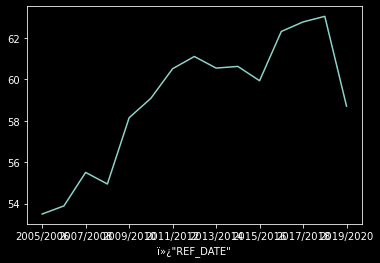

In [23]:
data = raw.loc[(raw["Sex of accused"] == "Total, sex of accused") & (raw["Age of accused"] == "Total, age of accused") & (raw["GEO"] == "Canada") & (raw['Offences'] == "Drug possession") & (raw["Charge and case"] == "Total charges")]
pivot = data.pivot(columns="Type of decision", index='ï»¿"REF_DATE"', values="VALUE")
pivot["%_withdrawn"] = round(pivot["Stayed or withdrawn"] / pivot["Total decisions"] * 100, 2)

pivot["%_withdrawn"].plot()

In [15]:
data = raw.loc[(raw["Sex of accused"] == "Total, sex of accused") & (raw["Age of accused"] == "Total, age of accused") & (raw["GEO"] == "Canada") & (raw['ï»¿"REF_DATE"'] == "Total offences") & (raw["Charge and case"] == "Total charges")]
pivot = data.pivot(columns="Type of decision", index='ï»¿"REF_DATE"', values="VALUE")

pivot

Type of decision,Acquitted,Guilty,Other decisions,Percentage guilty,Stayed or withdrawn,Total decisions
"ï»¿""REF_DATE""",,,,,,
2005/2006,37109.0,483248.0,27601.0,44.0,546473.0,1094431.0
2006/2007,36690.0,487424.0,25767.0,44.0,559706.0,1109587.0
2007/2008,33853.0,500729.0,23043.0,43.0,593884.0,1151509.0
2008/2009,34629.0,518610.0,23867.0,44.0,610218.0,1187324.0
2009/2010,37352.0,523602.0,26686.0,43.0,636551.0,1224191.0
2010/2011,35985.0,512358.0,27336.0,42.0,649108.0,1224787.0
2011/2012,40674.0,500845.0,22825.0,42.0,631825.0,1196169.0
2012/2013,40407.0,498325.0,20737.0,42.0,622876.0,1182345.0
2013/2014,37762.0,481542.0,25954.0,42.0,601942.0,1147200.0


In [14]:
data

,"ï»¿""REF_DATE""",GEO,DGUID,Offences,Age of accused,Sex of accused,Charge and case,Type of decision,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
4761600,2005/2006,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Total decisions,Number,223,units,0,v55106358,1.1.1.1.1.1,1094431.0,NaN,NaN,NaN,0
4761601,2005/2006,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Guilty,Number,223,units,0,v55106359,1.1.1.1.1.2,483248.0,NaN,NaN,NaN,0
4761602,2005/2006,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Percentage guilty,Percentage,242,units,0,v55106360,1.1.1.1.1.3,44.0,NaN,NaN,NaN,0
4761603,2005/2006,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Acquitted,Number,223,units,0,v55106361,1.1.1.1.1.4,37109.0,NaN,NaN,NaN,0
4761604,2005/2006,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Total charges,Stayed or withdrawn,Number,223,units,0,v55106362,1.1.1.1.1.5,546473.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13094425,2019/2020,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Related charges,Guilty,Number,223,units,0,v55106383,1.1.1.1.5.2,235526.0,NaN,NaN,NaN,0
13094426,2019/2020,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Related charges,Percentage guilty,Percentage,242,units,0,v55106384,1.1.1.1.5.3,28.0,NaN,NaN,NaN,0
13094427,2019/2020,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Related charges,Acquitted,Number,223,units,0,v55106385,1.1.1.1.5.4,20096.0,NaN,NaN,NaN,0
13094428,2019/2020,Canada,2016A000011124,Total offences,"Total, age of accused","Total, sex of accused",Related charges,Stayed or withdrawn,Number,223,units,0,v55106386,1.1.1.1.5.5,562191.0,NaN,NaN,NaN,0
